## **About Stable Diffusion**
Stable Diffusion is a state-of-the-art AI model designed to `generate images based on textual descriptions`. It operates through a process of iterative noise removal, transforming random patterns into coherent and high-quality visuals guided by a text prompt. This model generates photorealistic, artistic, and conceptual imagery, making it highly versatile for use in fields such as graphic design, digital art, advertising, and creative ideation. Stable Diffusion’s efficiency, coupled with its ability to render intricate details, empowers users to bring their imaginations to life with remarkable precision.


In [ ]:
!pip install transformers diffusers accelerate
!pip install xformers
!pip install pillow
!pip install fastapi



```
[User Interface] --> [Request Handling] --> [Server with Stable Diffusion] --> [Image Generation]
^                                                                                   |
|                                                                                   v
+-- [Response (Generated Image)] <---- [Bandwidth Handling] <-- [SSRDK Data Routing]

```



In [ ]:
!pip uninstall -y torchvision

Found existing installation: torchvision 0.20.0+cu121
Uninstalling torchvision-0.20.0+cu121:
  Successfully uninstalled torchvision-0.20.0+cu121


In [ ]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!pip install torchaudio==2.0.2+cu118 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.0+cu121
    Uninstalling torchaudio-2.5.0+cu121:
      Successfully uninstalled torchaudio-2.5.0+cu121


In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import io
import streamlit as st

# FastAPI setup
app = FastAPI()

# Model loading (Stable Diffusion)
model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# Request Model
class ImageRequest(BaseModel):
    prompt: str

@app.post("/generate_image/")
async def generate_image(request: ImageRequest):
    try:
        # Generate image from prompt
        image = pipe(request.prompt).images[0]

        # Save the image
        img_byte_arr = io.BytesIO()
        image.save(img_byte_arr, format='JPEG')
        img_byte_arr.seek(0)

        # Return the image as response
        return {"image": img_byte_arr.getvalue()}

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

  0%|          | 0/50 [00:00<?, ?it/s]

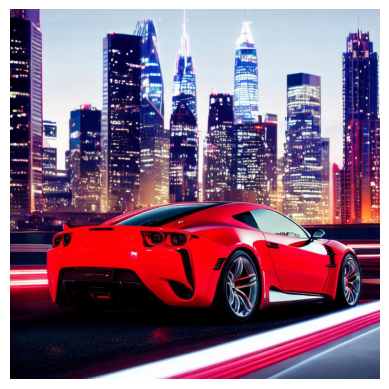

  0%|          | 0/50 [00:00<?, ?it/s]

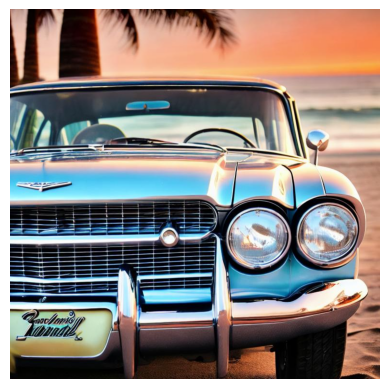

  0%|          | 0/50 [00:00<?, ?it/s]

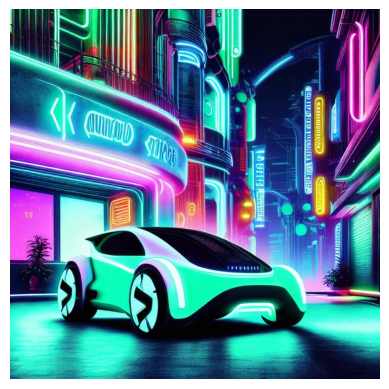

  0%|          | 0/50 [00:00<?, ?it/s]

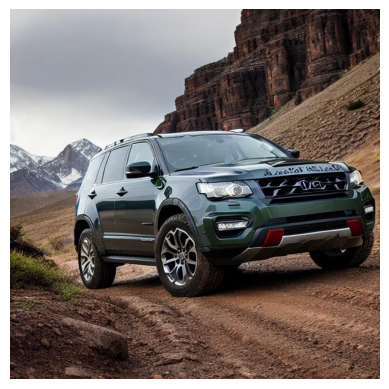

  0%|          | 0/50 [00:00<?, ?it/s]

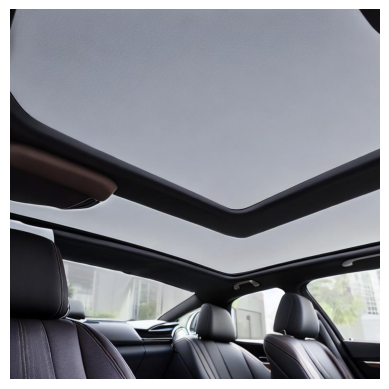

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# List of shortened prompts to generate images
prompts = [
    "Futuristic red sports car, city skyline, night setting",
    "Vintage 1960s classic car, chrome details, parked by the beach, sunset",
    "Futuristic electric vehicle, high-tech city, neon lights, nighttime",
    "Off-road SUV, rugged terrain, mountains in the background",
    "Luxury sedan, leather interiors, modern dashboard, sunroof open"
]

# Save and display the generated images based on prompts
def generate_images():
    images = []
    for i, prompt in enumerate(prompts):
        image = pipe(prompt).images[0]

        # Save locally for testing purposes
        image.save(f'car_image_{i}.jpg')
        images.append(image)

        # Display the image
        display_image = Image.open(f'car_image_{i}.jpg')  # Open the saved image
        plt.imshow(display_image)
        plt.axis("off")  # Hide axes
        plt.show()

generate_images()


## Documentation Links


*   
[Notepad References](https://drive.google.com/file/d/1cT3JE53fFEZPLPdPS5WjSQTDtiaGTZBT/view?usp=sharing)